# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [1]:
%matplotlib inline
#matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Plot text color, uncomment 'black' for a light background
# COLOR = 'white'
COLOR = '#e8f0ff' # A very light grey, close to white
COLOR = 'black'

# plt.rcParams['axes.facecolor']= '#373e4b' # Color of Notebook Theme background
plt.rcParams['axes.facecolor']= '#e8f0ff' # A very light grey, close to white 
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams.update({'font.size': 22})

### Derivative Function

In [2]:

def derivative(func, x, dx, mode='ed'):
    ''' Evaluates the derivative of the passed function at the passed value.

    One of the following methods is used:
        'Forward Difference', 
        'Central Difference', 
        'Extrapolated Difference'
    
    Parameters
    ----------
    func : function
        The function to differentiated
    x : float
        The value at which the differentiated function will be evaluated
    dx : float
        The differntial
    mode : str, optional
        The method by which the derivative is calculated (default is 'ed' or 
            'Extrapoloated Difference')
    
    Returns
    -------
    float
        The calculated derivative at position x

    '''
    
    if mode==('Forward Difference' or 'fw'):
        return (func(x+dx)-func(x))/dx
    elif mode==('Central Difference' or 'cd'):
        d2 = dx/2.
        return (func(x+d2)-func(x-d2))/dx
    elif mode==('Extrapolated Difference' or 'ed'):
        d4 = dx/4.
        d2 = dx/2.
        d3 = 3.*dx
        return (8*(func(x+d4)-func(x-d4))-(func(x+d2) - func(x-d2)))/d3
    else:
        return 'Invalid mode.'
        

In [3]:
help(derivative)

Help on function derivative in module __main__:

derivative(func, x, dx, mode='ed')
    Evaluates the derivative of the passed function at the passed value.
    
    One of the following methods is used:
        'Forward Difference', 
        'Central Difference', 
        'Extrapolated Difference'
    
    Parameters
    ----------
    func : function
        The function to differentiated
    x : float
        The value at which the differentiated function will be evaluated
    dx : float
        The differntial
    mode : str, optional
        The method by which the derivative is calculated (default is 'ed' or 
            'Extrapoloated Difference')
    
    Returns
    -------
    float
        The calculated derivative at position x



### List of modes used by the derivative function

In [4]:
mode = ['Forward Difference', 
        'Central Difference', 
        'Extrapolated Difference']

### Testing the function mode at x = π/4

In [5]:
x=np.pi/4.
dx=0.1
print(f'{mode[0]}:',derivative(np.cos,x,dx, mode[0]))
print(f'{mode[1]}:',derivative(np.cos,x,dx, mode[1]))
print(f'{mode[2]}:',derivative(np.cos,x,dx, mode[2]))
print('Analytical Result:',-1*np.sin(x))

Forward Difference: -0.7412547450958928
Central Difference: -0.7068121901873392
Extrapolated Difference: -0.707106771980113
Analytical Result: -0.7071067811865476


## Plotting the Forward Difference errors versus dx values at x=π/4

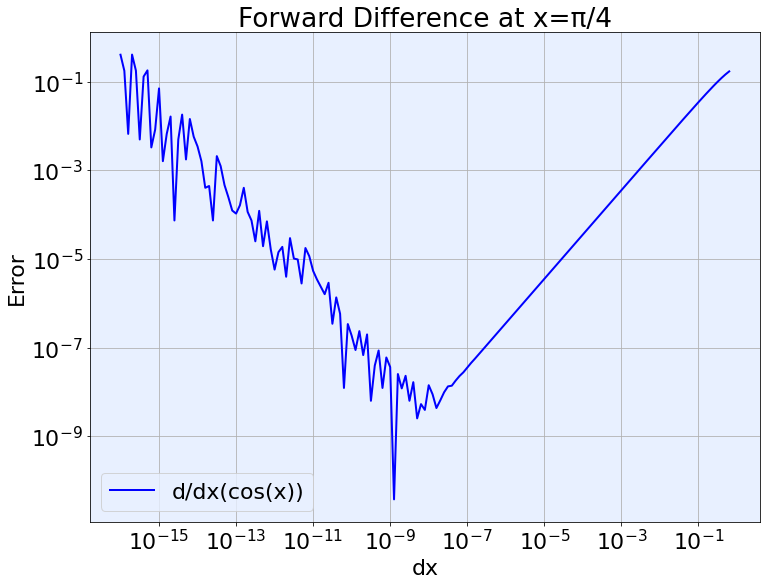

In [6]:
print_sin = False
# print_sin = True
md=mode[0] # Central Difference

x=np.pi/4
dxarr=[]
yarr=[]
incr = .1
for dx in 10**np.arange(-16., -.1, incr):
    y=derivative(np.cos,x,dx, mode=md)
#     print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

_dxarr=[]
_yarr=[]
for dx in 10**np.arange(-16., -.1, .1):
    y=derivative(np.sin,x,dx, md)
#     print('dx %g,  y %g'%(dx,y))
    _dxarr.append(dx)
    _yarr.append(y)


plt.plot(dxarr, abs(yarr+np.sin(x)), 'b-', lw=2)
if print_sin:
    plt.plot(_dxarr, abs(_yarr-np.cos(x)), 'r-', lw=2)
plt.legend(labels=('d/dx(cos(x))', 'd/dx(sin(x))'))
plt.grid()
plt.title(f'{md} at x=π/4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()


In [7]:
min_err = 1.
min_dx = 0.0
count = 0
for dx in 10**np.arange(-16., -.1, incr):
    if abs(yarr[count]+np.sin(x)) < min_err:
        min_err = abs(yarr[count]+np.sin(x))
        min_dx = dx
    else:
        pass
    count +=1
    
print('Minimum error:', min_err)
print('Minimum dx:', min_dx)

Minimum error: 3.771172263355993e-11
Minimum dx: 1.258925411794094e-09


### Optimal dx value for Forward Difference algorithm

The optimal dx for the Forward Difference algorithm is ~$dx^{-9}$ which corresponds to an error value of ~$10^{-11}$


## Plotting the Central Difference errors versus dx values at x=π/4

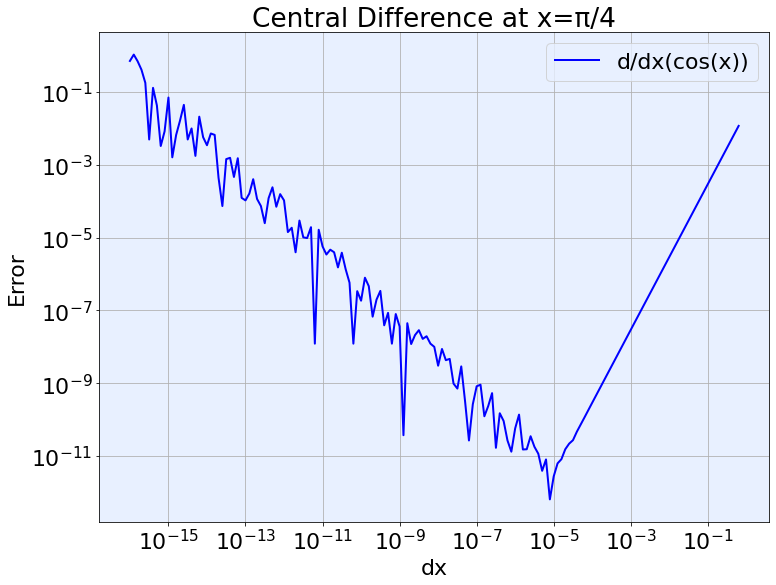

In [8]:
print_sin = False
# print_sin = True
md=mode[1] # Central Difference

x=np.pi/4
dxarr=[]
yarr=[]
incr = .1
for dx in 10**np.arange(-16., -.1, incr):
    y=derivative(np.cos,x,dx, mode=md)
#     print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

_dxarr=[]
_yarr=[]
for dx in 10**np.arange(-16., -.1, .1):
    y=derivative(np.sin,x,dx, md)
#     print('dx %g,  y %g'%(dx,y))
    _dxarr.append(dx)
    _yarr.append(y)


plt.plot(dxarr, abs(yarr+np.sin(x)), 'b-', lw=2)
if print_sin:
    plt.plot(_dxarr, abs(_yarr-np.cos(x)), 'r-', lw=2)
plt.legend(labels=('d/dx(cos(x))', 'd/dx(sin(x))'))
plt.grid()
plt.title(f'{md} at x=π/4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()


In [9]:
min_err = 1.
min_dx = 0.0
count = 0
for dx in 10**np.arange(-16., -.1, incr):
    if abs(yarr[count]+np.sin(x)) < min_err:
        min_err = abs(yarr[count]+np.sin(x))
        min_dx = dx
    else:
        pass
    count +=1
    
print('Minimum error:', min_err)
print('Minimum dx:', min_dx)

Minimum error: 6.539213615042172e-13
Minimum dx: 7.943282347242107e-06


### Optimal dx value for Central Difference algorithm

The optimal dx for the Central Difference algorithm is ~$dx^{-6}$ which corresponds to an error value of ~$10^{-13}$


## Forward Difference vs. Central Difference

The Central Difference algorithm is superior to the Forward Difference as it has an error of around two orders of magnitude smaller with a dx three orders of magnitude larger.

## Plotting the Extrapolated Difference errors versus dx values at x=π/4

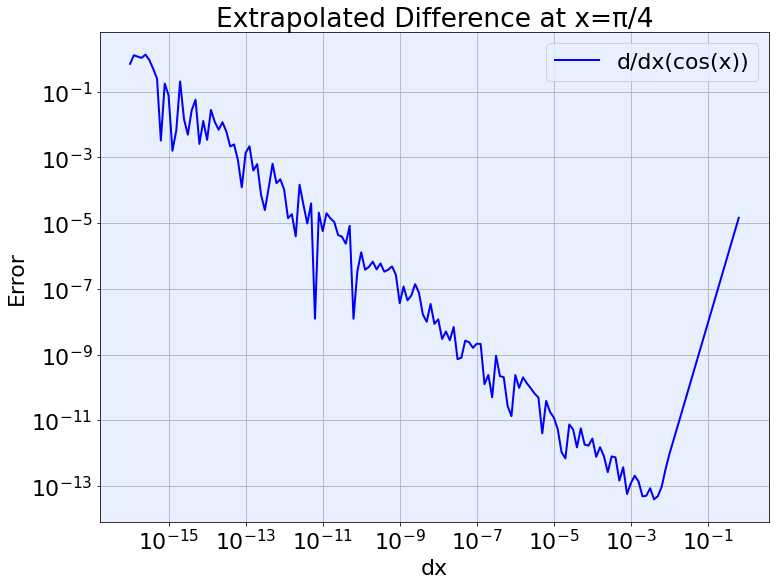

In [10]:
print_sin = False
# print_sin = True
md=mode[2] # Extrapolated Difference

x=np.pi/4
dxarr=[]
yarr=[]
incr = .1
for dx in 10**np.arange(-16., -.1, incr):
    y=derivative(np.cos,x,dx, mode=md)
#     print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

_dxarr=[]
_yarr=[]
for dx in 10**np.arange(-16., -.1, .1):
    y=derivative(np.sin,x,dx, md)
#     print('dx %g,  y %g'%(dx,y))
    _dxarr.append(dx)
    _yarr.append(y)


plt.plot(dxarr, abs(yarr+np.sin(x)), 'b-', lw=2)
if print_sin:
    plt.plot(_dxarr, abs(_yarr-np.cos(x)), 'r-', lw=2)
plt.legend(labels=('d/dx(cos(x))', 'd/dx(sin(x))'))
plt.grid()
plt.title(f'{md} at x=π/4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()

In [11]:
min_err = 1.
min_dx = 0.0
count = 0
for dx in 10**np.arange(-16., -.1, incr):
    if abs(yarr[count]+np.sin(x)) < min_err:
        min_err = abs(yarr[count]+np.sin(x))
        min_dx = dx
    else:
        pass
    count +=1
    
print('Minimum error:', min_err)
print('Minimum dx:', min_dx)

Minimum error: 3.885780586188048e-14
Minimum dx: 0.003981071705534529


### Optimal dx value for Extrapolated Difference algorithm

The optimal dx for the Extrapolated Difference algorithm is ~$dx^{-3}$ which corresponds to an error value of ~$10^{-14}$


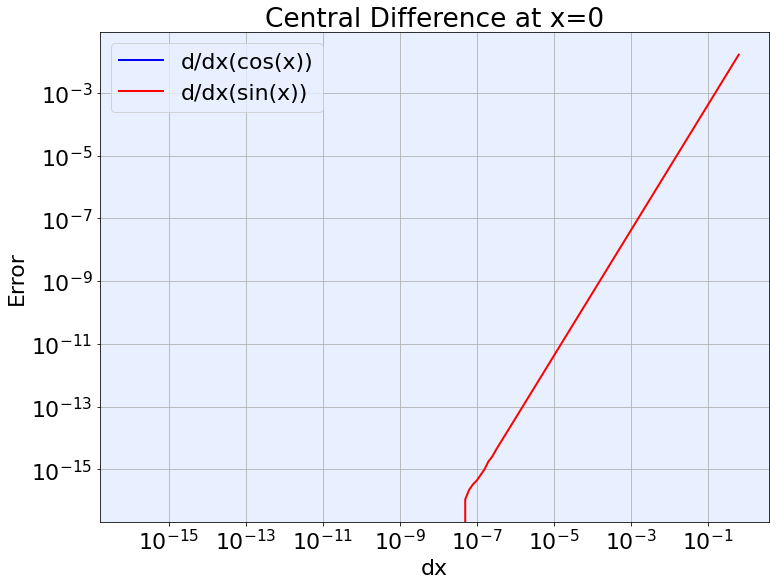

In [12]:
print_sin = False
print_sin = True
md=mode[1] # Extrapolated Difference

x=0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-16., -.1, .1):
    y=derivative(np.cos,x,dx, mode=md)
#     print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

_dxarr=[]
_yarr=[]
for dx in 10**np.arange(-16., -.1, .1):
    y=derivative(np.sin,x,dx, md)
#     print('dx %g,  y %g'%(dx,y))
    _dxarr.append(dx)
    _yarr.append(y)


plt.plot(dxarr, abs(yarr+np.sin(x)), 'b-', lw=2)
if print_sin:
    plt.plot(_dxarr, abs(_yarr-np.cos(x)), 'r-', lw=2)
plt.legend(labels=('d/dx(cos(x))', 'd/dx(sin(x))'))
plt.grid()
plt.title(f'{md} at x={x}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()

### Error of $cos(x)$ derivative at x=0, Central Difference algorithm

The error for the derivative of $cos(x)$ at $x=0$ is exactly zero for values of dx. This can be seen in when looking at the central difference formula:
\
\
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}
\
\
Let $t=x=0$ and $h=dx$
\
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(0+dx/2)-y(0-dx/2)}{dx}
\end{equation}
\
then
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(dx/2)-y(-dx/2)}{dx}
\end{equation}
\
Since $cos(x)$ is an even function, i.e. $f(-x)=f(x)$, then
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(dx/2)-y(dx/2)}{dx} = 0
\end{equation}
\
So taking the derivative of any even function at zero will give an exact answer of zero.
\
\
By the same logic, this also applies for Extrapolated Difference algorithm.
\
\
\begin{equation}
\frac{d y(t)}{dt}_{ed} =\frac{8[y(t+h/4)-y(t-h/4)]-[y(t+h/2)-y(t-h/2)]}{3 h}
\end{equation}